#### (1) Setup ... continue

"Open To" this folder and in Terminal, set up the environment, if needed.

`conda env update -f environment.yml`

`conda activate elt`

`pip install -r requirements.txt`

#### In case you log off your GPC, use this step to authenticate GPC

`gcloud auth application-default login`

#### Options:
Updates are available for some Google Cloud CLI components.  To install them,
please run:

`gcloud components update`

In [38]:
# Choose kernel as needed, say elt
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.cloud import bigquery

In [39]:
# Create output directory if it doesn't exist
output_dir = './BigQuery_reports'
os.makedirs(output_dir, exist_ok=True)

In [40]:
# Initialize BigQuery client
client = bigquery.Client(project="sonic-verbena-461903-e8")  # <<< Change this to your GCP project ID

/home/fabe/miniconda3/envs/dwh/lib/python3.10/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


Continue ...

In [41]:
# Variable to hold the table name
table_name = "olist_dataset.fact_state_clv"
# Query to fetch the data
query = f"""
SELECT *
FROM `{table_name}`
"""
# Execute the query and convert the result to a pandas DataFrame
df = client.query(query).result().to_dataframe(create_bqstorage_client=True)

# Save the DataFrame to a CSV file
output_file = os.path.join(output_dir, 'fact_state_clv.csv')
df.to_csv(output_file, index=False)


/home/fabe/miniconda3/envs/dwh/lib/python3.10/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [42]:
# from df, describe the table fact_state_clv.
# Display the first few rows of the DataFrame
df.head()

,state,total_customers,total_clv,avg_clv,max_clv,min_clv
0,PB,519,141947.86,273.502620,4681.78,29.74
1,AC,77,19680.62,255.592468,1251.70,39.03
2,RO,239,60738.30,254.135146,2452.12,34.34
3,AL,401,97729.27,243.713890,2269.98,32.39
4,AP,67,16262.80,242.728358,1482.42,34.80


In [43]:
# Display the summary information of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            27 non-null     object 
 1   total_customers  27 non-null     Int64  
 2   total_clv        27 non-null     float64
 3   avg_clv          27 non-null     float64
 4   max_clv          27 non-null     float64
 5   min_clv          27 non-null     float64
dtypes: Int64(1), float64(4), object(1)
memory usage: 1.4+ KB


In [44]:
# Print the initial_rows of the DataFrame as variable
initial_rows = len(df)
print(f"Initial rows: {initial_rows}")

Initial rows: 27


In [45]:
# Convert df to lower case
df.columns = df.columns.str.lower()

In [46]:
# Remove duplicate rows
df = df.drop_duplicates()
# Display the DataFrame information after removing duplicates
df.info()
# Print the percentage of row balance
percentage = (len(df) / initial_rows) * 100
print(f"\nPercentage of rows after removing duplicates: {percentage:.2f}%")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            27 non-null     object 
 1   total_customers  27 non-null     Int64  
 2   total_clv        27 non-null     float64
 3   avg_clv          27 non-null     float64
 4   max_clv          27 non-null     float64
 5   min_clv          27 non-null     float64
dtypes: Int64(1), float64(4), object(1)
memory usage: 1.4+ KB

Percentage of rows after removing duplicates: 100.00%


In [47]:
# Convert total_customers to Int32
df['total_customers'] = pd.to_numeric(df['total_customers'], errors='coerce').astype('Int32')

# Convert total_clv, avg_clv, max_clv, min_clv to numeric with 2 decimal places
df['total_clv'] = pd.to_numeric(df['total_clv'], errors='coerce').round(2)
df['avg_clv'] = pd.to_numeric(df['avg_clv'], errors='coerce').round(2)
df['max_clv'] = pd.to_numeric(df['max_clv'], errors='coerce').round(2)
df['min_clv'] = pd.to_numeric(df['min_clv'], errors='coerce').round(2)

# Sort using state column in ascending order
df = df.sort_values(by='state', ascending=True)

# Display the DataFrame information after converting to numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1 to 6
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            27 non-null     object 
 1   total_customers  27 non-null     Int32  
 2   total_clv        27 non-null     float64
 3   avg_clv          27 non-null     float64
 4   max_clv          27 non-null     float64
 5   min_clv          27 non-null     float64
dtypes: Int32(1), float64(4), object(1)
memory usage: 1.4+ KB


In [48]:
# Display the first few rows of the DataFrame
df.head()

,state,total_customers,total_clv,avg_clv,max_clv,min_clv
1,AC,77,19680.62,255.59,1251.70,39.03
3,AL,401,97729.27,243.71,2269.98,32.39
16,AM,143,27966.93,195.57,1853.75,29.65
4,AP,67,16262.80,242.73,1482.42,34.80
17,BA,3277,616955.42,188.27,3358.24,21.99


In [49]:
# Describe df
df.describe()

,total_customers,total_clv,avg_clv,max_clv,min_clv
count,27.0,2.700000e+01,27.000000,27.000000,27.000000
mean,3559.074074,5.929212e+05,205.503333,4099.799259,25.213704
std,7981.140043,1.201663e+06,32.770346,2835.218863,9.075680
min,45.0,1.006462e+04,148.880000,994.770000,0.000000
25%,370.5,8.641024e+04,174.760000,2129.865000,19.345000
50%,875.0,1.870234e+05,209.930000,3242.840000,26.130000
75%,2675.5,4.860984e+05,225.185000,4745.610000,32.120000
max,40290.0,5.998561e+06,273.500000,13664.080000,39.030000


#### CLV stands for Customer Lifetime Value. 

* It represents the total revenue or profit a business expects to earn from a customer over the entire duration of their relationship.
  
In the dataset:

- total_clv: sums up the lifetime value of all customers in a given state.
- avg_clv:  the average value per customer.
- max_clv and min_clv show the range of individual customer values.


#### Understanding customer profitability for guiding marketing and retention strategies. 

#### (1) Analysis of Customer Lifetime Value

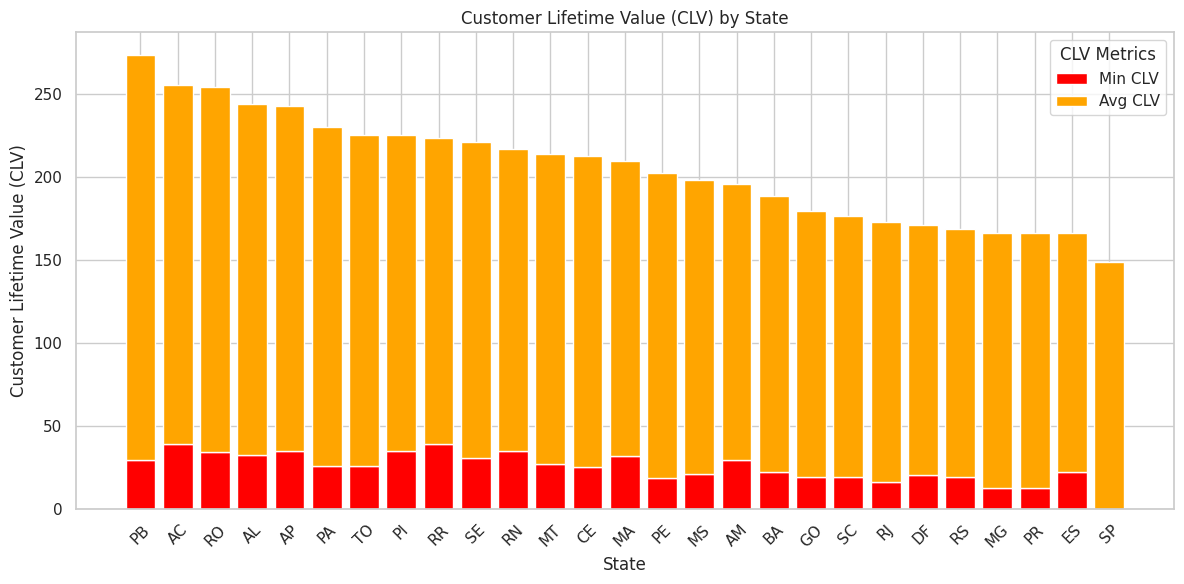

In [50]:
# Bar Plot - For comparing metrics across states to show
# avg_clv and min_clv as stacked bars
# sorted by highest avg_clv to lowest avg_clv


# Sort df by avg_clv descending
df_sorted = df.sort_values(by='avg_clv', ascending=False)

# Set the style of seaborn
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

# Plot stacked bars using matplotlib
bar1 = plt.bar(df_sorted['state'], df_sorted['min_clv'], color='red', label='Min CLV')
bar2 = plt.bar(df_sorted['state'], df_sorted['avg_clv'] - df_sorted['min_clv'], 
			   bottom=df_sorted['min_clv'], color='orange', label='Avg CLV')

plt.title('Customer Lifetime Value (CLV) by State')
plt.xlabel('State')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.legend(title='CLV Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'clv_by_state.png'))
plt.show()


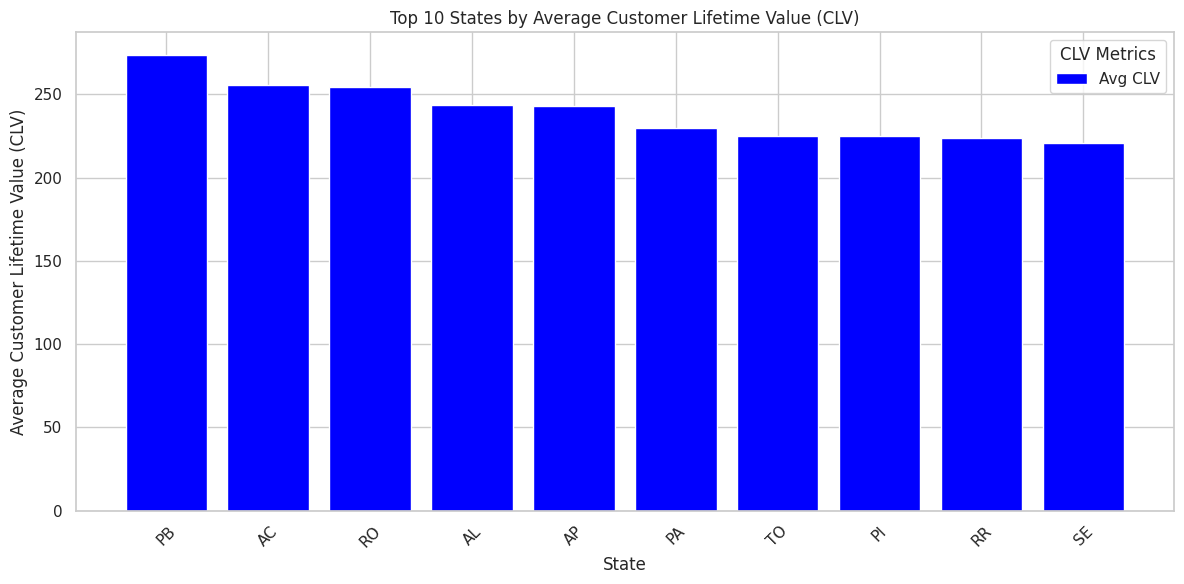


Top 10 States by Average Customer Lifetime Value (CLV):
state  avg_clv  % of mean
   PB   273.50       4.93
   AC   255.59       4.61
   RO   254.14       4.58
   AL   243.71       4.39
   AP   242.73       4.37
   PA   230.03       4.15
   TO   225.22       4.06
   PI   225.15       4.06
   RR   223.66       4.03
   SE   220.86       3.98


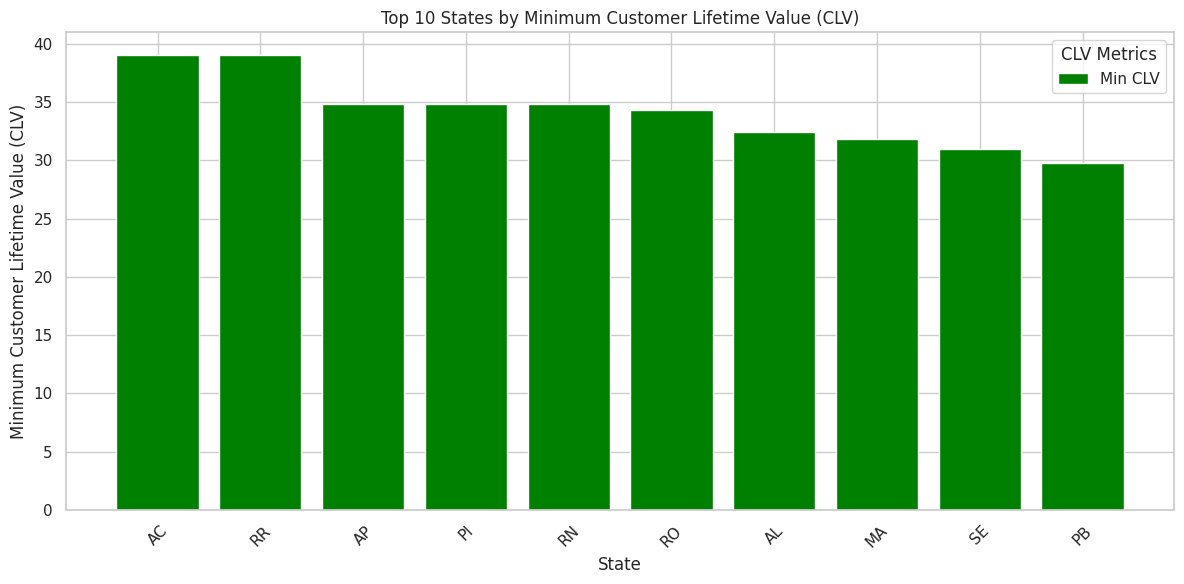

In [51]:
# Bar Plot - For comparing metrics across states using
# avg_clv, sorting from highest avg_clv to lowest avg_clv, showing only top 10 states
plt.figure(figsize=(12, 6))
# Sort df by avg_clv descending and select top 10 states
df_sorted_top10 = df.sort_values(by='avg_clv', ascending=False).head(10)
# Plot avg_clv for top 10 states
bar = plt.bar(df_sorted_top10['state'], df_sorted_top10['avg_clv'], color='blue', label='Avg CLV')
plt.title('Top 10 States by Average Customer Lifetime Value (CLV)')
plt.xlabel('State')
plt.ylabel('Average Customer Lifetime Value (CLV)')
plt.legend(title='CLV Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'top_10_avg_clv_by_state.png'))
plt.show()

# Display the top 10 states by avg_clv as a table, with percentage of average clv
total_avg_clv = df['avg_clv'].sum()
df_sorted_top10['% of mean'] = (df_sorted_top10['avg_clv'] / total_avg_clv * 100).round(2)
print("\nTop 10 States by Average Customer Lifetime Value (CLV):")
print(df_sorted_top10[['state', 'avg_clv', '% of mean']].to_string(index=False))
# Bar Plot - For comparing metrics across states using
# min_clv, sorting from highest min_clv to lowest min_clv, showing only top 10 states
plt.figure(figsize=(12, 6))
# Sort df by min_clv descending and select top 10 states
df_sorted_top10_min = df.sort_values(by='min_clv', ascending=False).head(10)
# Plot min_clv for top 10 states
bar_min = plt.bar(df_sorted_top10_min['state'], df_sorted_top10_min['min_clv'], color='green', label='Min CLV')
plt.title('Top 10 States by Minimum Customer Lifetime Value (CLV)')
plt.xlabel('State')
plt.ylabel('Minimum Customer Lifetime Value (CLV)')
plt.legend(title='CLV Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'top_10_min_clv_by_state.png'))
plt.show()


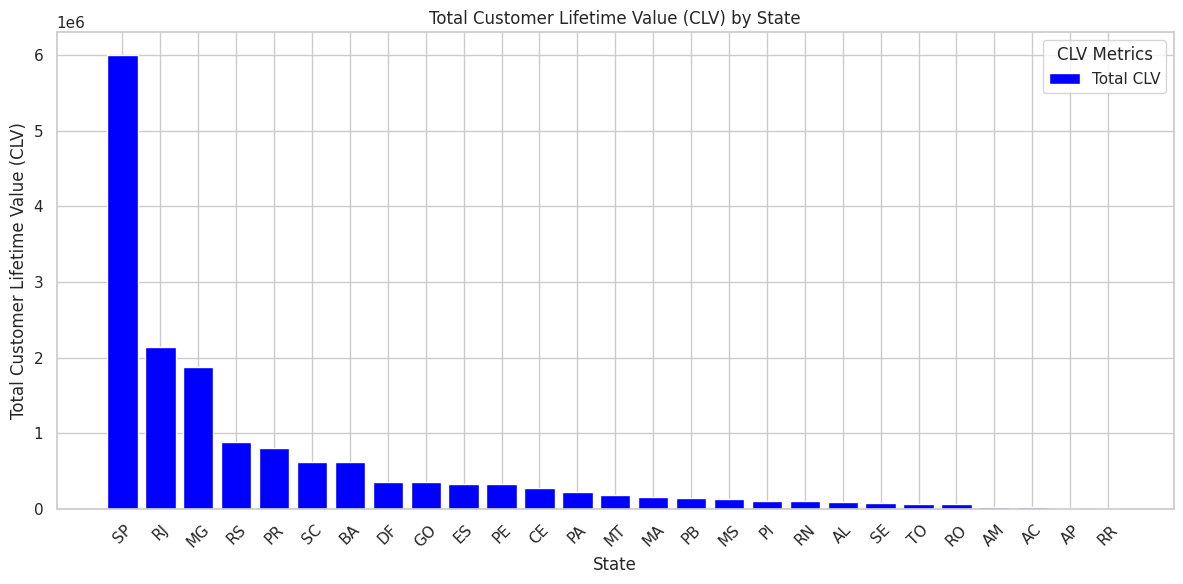

state  total_clv
   SP 5998561.07
   RJ 2143858.74
   MG 1872735.23
   RS  890920.02
   PR  811539.35
   SC  622270.80
   BA  616955.42
   DF  355241.38
   GO  350537.11
   ES  325834.30
   PE  324717.53
   CE  278609.01
   PA  218295.85
   MT  187023.43
   MA  151988.74
   PB  141947.86
   MS  137575.09
   PI  108523.97
   RN  102718.13
   AL   97729.27
   SE   75091.22
   TO   61485.33
   RO   60738.30
   AM   27966.93
   AC   19680.62
   AP   16262.80
   RR   10064.62


In [52]:
# Do the same as above, but for total_clv only, sorted by highest total_clv to lowest total_clv
plt.figure(figsize=(12, 6))
# Sort df by total_clv descending
df_sorted_total = df.sort_values(by='total_clv', ascending=False)
# Plot stacked bars using matplotlib
bar_total = plt.bar(df_sorted_total['state'], df_sorted_total['total_clv'], color='blue', label='Total CLV')
plt.title('Total Customer Lifetime Value (CLV) by State')
plt.xlabel('State')
plt.ylabel('Total Customer Lifetime Value (CLV)')
plt.legend(title='CLV Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot to a file
output_plot = os.path.join(output_dir, 'clv_by_state_Total.png')
plt.savefig(output_plot)		
# Show the plot
plt.show()

# Print above plot as a table to show the total_clv by state
print(df_sorted_total[['state', 'total_clv']].to_string(index=False))


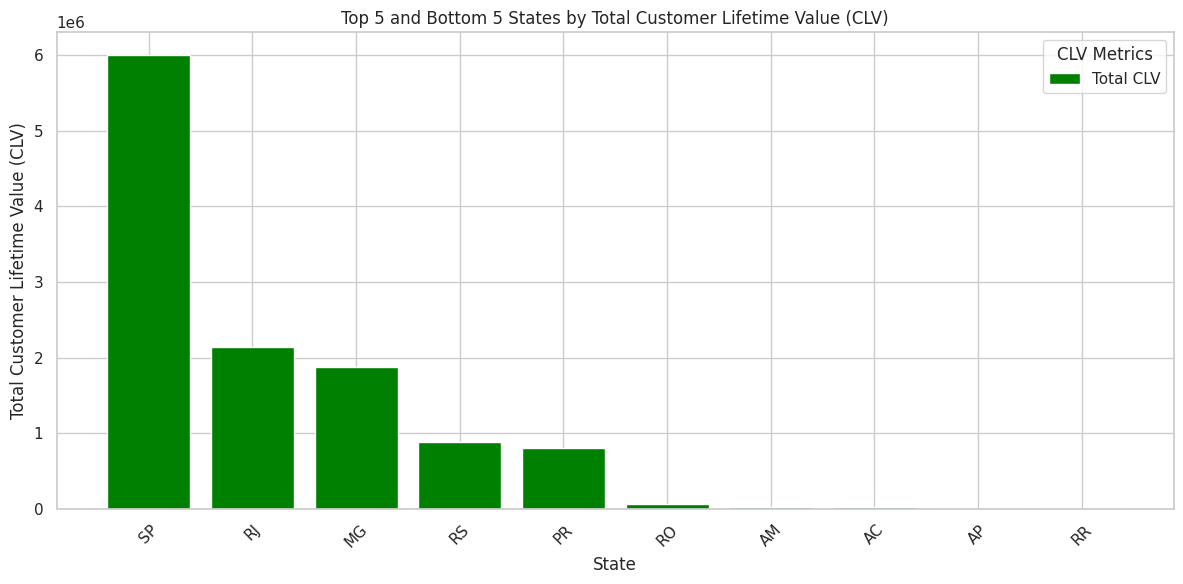


Top 5 and Bottom 5 States by Total Customer Lifetime Value (CLV):
state  total_clv  % total
   SP 5998561.07    37.47
   RJ 2143858.74    13.39
   MG 1872735.23    11.70
   RS  890920.02     5.57
   PR  811539.35     5.07
   RO   60738.30     0.38
   AM   27966.93     0.17
   AC   19680.62     0.12
   AP   16262.80     0.10
   RR   10064.62     0.06


In [53]:
# Select top 5 and bottom 5 states by total_clv from df_sorted_total
top_5_states = df_sorted_total.head(5)
bottom_5_states = df_sorted_total.tail(5)

# Combine top 5 and bottom 5 states by total_clv
combined_states = pd.concat([top_5_states, bottom_5_states])

# Plot total_clv for top 5 and bottom 5 states, sorted by highest total_clv to lowest total_clv
plt.figure(figsize=(12, 6))
combined_states_sorted = combined_states.sort_values(by='total_clv', ascending=False)
bar_combined = plt.bar(combined_states_sorted['state'], combined_states_sorted['total_clv'], color='green', label='Total CLV')
plt.title('Top 5 and Bottom 5 States by Total Customer Lifetime Value (CLV)')
plt.xlabel('State')
plt.ylabel('Total Customer Lifetime Value (CLV)')
plt.legend(title='CLV Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
output_combined_plot = os.path.join(output_dir, 'clv_by_state_Top_Bottom.png')
plt.savefig(output_combined_plot)
plt.show()

# Print to a table the top 5 and bottom 5 states by total_clv, with percentage of total_clv
total_clv_sum = df['total_clv'].sum()
combined_states_table = combined_states.copy()
combined_states_table['% total'] = (combined_states_table['total_clv'] / total_clv_sum * 100).round(2)
print("\nTop 5 and Bottom 5 States by Total Customer Lifetime Value (CLV):")
print(combined_states_table[['state', 'total_clv', '% total']].to_string(index=False))


In [54]:
# List the states as a new variable for
states_compare = ['AC', 'PB', 'RR', 'SP', 'AP', 'SP']

# Print the states to compare
print("\nStates to compare:")
print(states_compare)

# Compare the states in states_compare with the df_sorted_total dataframe, with percentage of total_clv
df_states_compare = df_sorted_total[df_sorted_total['state'].isin(states_compare)].copy()
df_states_compare['% of total'] = (df_states_compare['total_clv'] / df_states_compare['total_clv'].sum() * 100).round(2)
print("\nStates to compare with Total Customer Lifetime Value (CLV):")
print(df_states_compare[['state', 'total_clv', '% of total']].to_string(index=False))



States to compare:
['AC', 'PB', 'RR', 'SP', 'AP', 'SP']

States to compare with Total Customer Lifetime Value (CLV):
state  total_clv  % of total
   SP 5998561.07       96.96
   PB  141947.86        2.29
   AC   19680.62        0.32
   AP   16262.80        0.26
   RR   10064.62        0.16


In [55]:
# Compare the states in states_compare with average clv, with percentage of average clv
df_states_compare_avg = df[df['state'].isin(states_compare)].copy()
df_states_compare_avg['% of avg clv'] = (df_states_compare_avg['avg_clv'] / df_states_compare_avg['avg_clv'].sum() * 100).round(2)
print("\nStates to compare with Average Customer Lifetime Value (CLV):")
print(df_states_compare_avg[['state', 'avg_clv', '% of avg clv']].to_string(index=False))


States to compare with Average Customer Lifetime Value (CLV):
state  avg_clv  % of avg clv
   AC   255.59         22.33
   AP   242.73         21.21
   PB   273.50         23.90
   RR   223.66         19.54
   SP   148.88         13.01


São Paulo (SP) is Brazil’s population titan. The state has about 44.6 million people, which is roughly 21% of the entire country’s population. It’s the most populous state by far and the economic engine of Brazil.

Rio de Janeiro (RJ) comes in second among these three, with a population of around 13.9 million in its metropolitan area. That’s about 6.5% of Brazil’s population, making it a major cultural and urban center.

Minas Gerais (MG) is the quiet powerhouse. With over 21.3 million residents, it’s the second most populous state in Brazil, accounting for about 10% of the national population


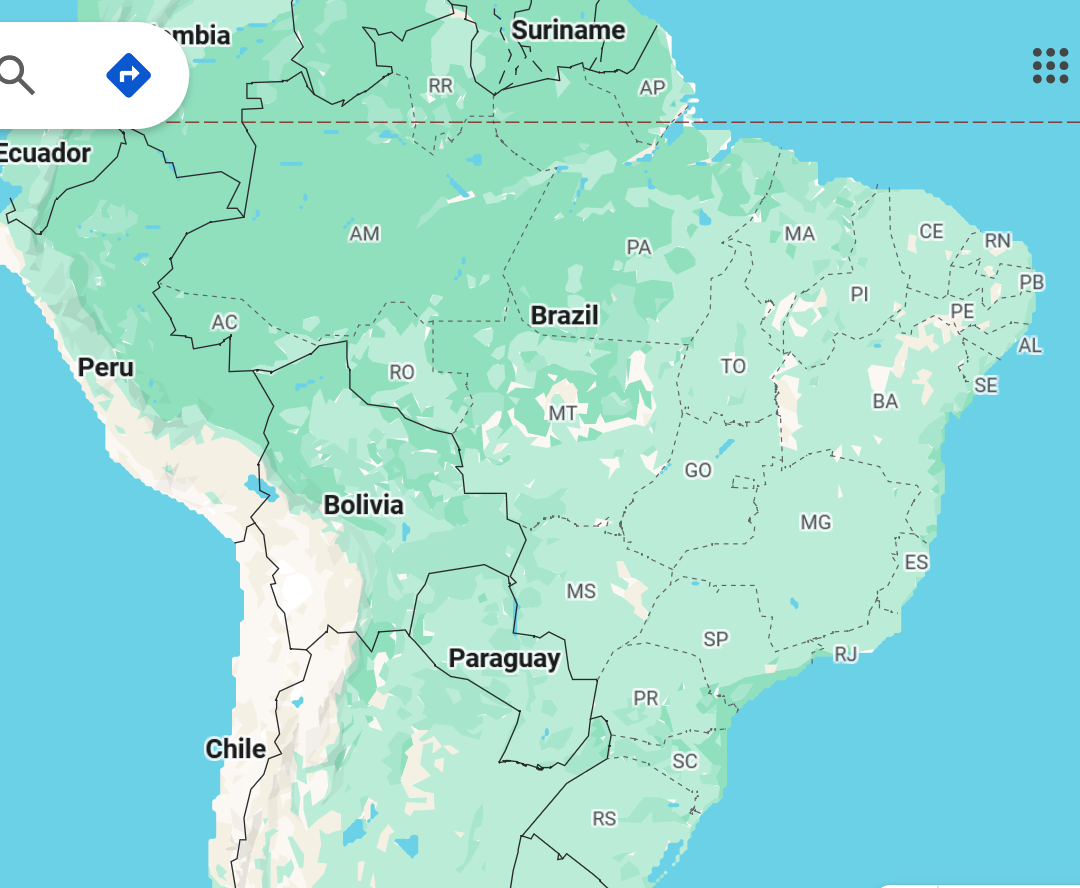